### Initialize a client object

In [10]:
from obspy.clients.fdsn import Client
import numpy as np

client = Client("IRIS")

### Get a waveform

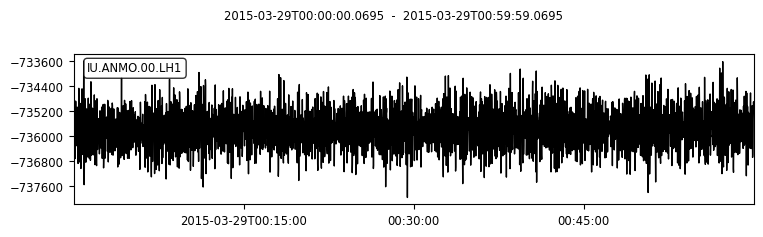

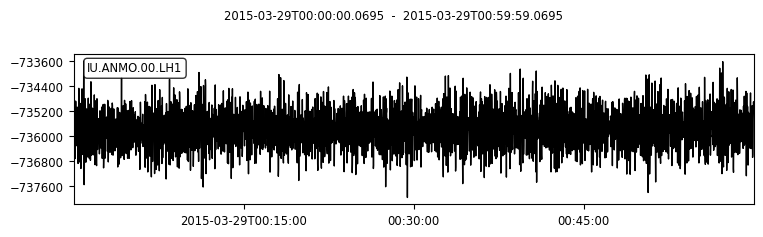

In [11]:
import obspy 
from obspy import UTCDateTime

 #= UTCDateTime("2010-02-27T06:45:00.000")
t = obspy.UTCDateTime('%04d-%02d-%02dT00:00:00.0000' % (2015, 3, 29))
#t1 = obspy.UTCDateTime('%04d-%02d-%02dT00:00:00.0000' % (year, month, day))

#st = client.get_waveforms("IU", "ANMO", "00", "LH1", t, t + 60 * 60)
st = client.get_waveforms("IU", "ANMO", "00", "LH1", t, t + 60 * 60)


st.plot()  

In [12]:
starttime = UTCDateTime("2002-01-01")
endtime = UTCDateTime("2002-01-02")

cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=6, catalog="ISC")

#print(cat)
print(vars(cat[0]))
print()
print('mags:',cat[0]['magnitudes'])

#for i in cat:
    #print(vars(i))
    
#print(np.log(1665579))

{'resource_id': ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=1237407"), 'event_type': 'earthquake', 'event_type_certainty': None, 'creation_info': None, 'preferred_origin_id': ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3110321"), 'preferred_magnitude_id': ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=16655792"), 'preferred_focal_mechanism_id': None, 'event_descriptions': [EventDescription(text='MINDANAO, PHILIPPINES', type='Flinn-Engdahl region')], 'comments': [], 'picks': [], 'amplitudes': [], 'focal_mechanisms': [], 'origins': [Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3110321"), time=UTCDateTime(2002, 1, 1, 11, 29, 22, 720000), longitude=125.749, latitude=6.282, depth=140100.0, creation_info=CreationInfo(author='ISC'))], 'magnitudes': [Magnitude(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=16655792"),

### Current FDSN Providers

In [13]:
from obspy.clients.fdsn.header import URL_MAPPINGS

for key in sorted(URL_MAPPINGS.keys()):

    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

BGR         http://eida.bgr.de
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
ISC         http://isc-mirror.iris.washington.edu
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         http://erde.geophysik.uni-muenchen.de
NCEDC       http://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  http://fdsnws.raspberryshakedata.com
RESIF       http://ws.resif.fr
SCEDC       http://service.scedc.caltech.edu
TEXNET      http://rtserve.beg.utexas.edu
USGS        http://earthquake.usgs.gov
USP         http://sismo.iag.usp.br


### Get KNMI clinet 

In [14]:
# Construct clinet using URL Key
client = Client('KNMI')
print(client)
print()

# Construct clinet using URL
client2 = Client('http://rdsa.knmi.nl')
print(client2)

FDSN Webservice Client (base url: http://rdsa.knmi.nl)
Available Services: 'dataselect' (v1.1.1), 'event' (v1.1.1), 'station' (v1.1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.

FDSN Webservice Client (base url: http://rdsa.knmi.nl)
Available Services: 'dataselect' (v1.1.1), 'event' (v1.1.1), 'station' (v1.1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


### Get Waveform (Author: Rhys, Edited: Thomas)

TYPE: <class 'obspy.core.utcdatetime.UTCDateTime'>
S: 1 Trace(s) in Stream:
NL.G343..HHZ | 2019-05-22T03:44:00.500000Z - 2019-05-22T03:45:22.500000Z | 200.0 Hz, 16401 samples
vars(S): {'traces': [<obspy.core.trace.Trace object at 0x121f16c18>]}
S.str: NL.G343..HHZ | 2019-05-22T03:44:00.500000Z - 2019-05-22T03:45:22.500000Z | 200.0 Hz, 16401 samples


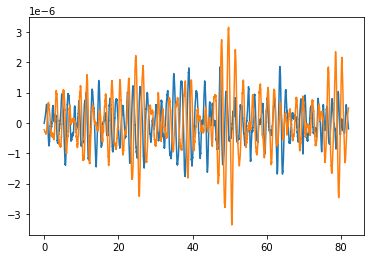

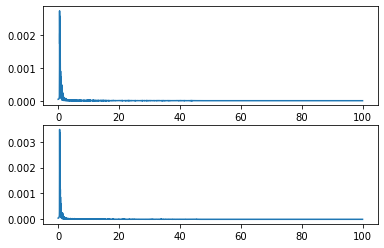

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def get_event_data(network, station, channel, origin, window, pfilt=None):

    client = Client('KNMI')
    #client = Client('http://rdsa.knmi.nl')

    t1 = origin
    t2 = t1 + window//200 + 1

    st = client.get_waveforms(network = network,
                              station = station,
                              location = '',
                              channel = channel,
                              starttime = t1,
                              endtime = t2,
                              attach_response = True)

    st.detrend(type = 'demean')

    if pfilt:
        st.remove_response(pre_filt = pfilt)
    else:
        st.remove_response()

    return st

#my_prefilt = (0.4, 0.5, 25.0, 27.5)
my_prefilt = (0.4, 0.5, 45.0, 47.5)

#t1 = obspy.UTCDateTime('20190609T05:00:15.0')
t1 = obspy.UTCDateTime('20190522T03:49:00.5') - 5*60
print("TYPE:", type(t1))

s = get_event_data('NL', 'G343', 'HHZ', t1, 16384, my_prefilt)
s_str = str(s[0])
print("S:",s)
print("vars(S):",vars(s))
print("S.str:",s_str)
r = get_event_data('NL', 'G343', 'HH2', t1, 16384, my_prefilt)
#s = get_event_data('NL', 'G340', 'HGZ', t1, 16384)
#r = get_event_data('NL', 'G340', 'HG2', t1, 16384)
#r = get_event_data('NL', 'G341', 'HHZ', t1, 16384)

starttime = max(s[0].stats.starttime, r[0].stats.starttime)
endtime = min(s[0].stats.endtime, r[0].stats.endtime)

s.trim(starttime, endtime)
r.trim(starttime, endtime)

#print(s[0].data.size, r[0].data.size)

fig, ax = plt.subplots()

signal = s[0].data
t = np.arange(signal.size, dtype = 'float')/200.0

ax.plot(t, signal)


signal = r[0].data
t = np.arange(signal.size, dtype = 'float')/200.0

ax.plot(t, signal)

A = np.fft.rfft(s[0].data[:16384])
B = np.fft.rfft(r[0].data[:16384])

freq = np.fft.rfftfreq(16384, 1.0/200.0)

fig, ax = plt.subplots(2)

ax[0].plot(freq, np.abs(A))
ax[1].plot(freq, np.abs(B))

plt.show()

### Get Station Metadata (Author: Rhys, Edited: Thomas)

In [ ]:
import requests
import argparse

def get_station_meta(network, station, FDSN):

    #FDSN = 'http://rdsa.knmi.nl/fdsnws/station/1/query'
    parameters = {'network': network,
                  'station': station,
                  'level': 'channel',
                  #'format': 'xml',
                  'format': 'text',
                  'nodata': '404'}

    resp = requests.get(FDSN, parameters)

    if (resp.status_code == 404):
        return None

    print(resp.url)
    return resp.text
# end get_station_meta()

myFDSN = 'http://rdsa.knmi.nl/fdsnws/station/1/query'
myNetwork = 'NL'
myStation = 'G431'

t = get_station_meta(myNetwork, myStation, myFDSN)
print(t)


### Get events of Magnitude 2 and greaters

In [ ]:
from gnam.events.gevents import gevents as gevents

enorth = gevents(3.4)

In [ ]:
#%matplotlib notebook
ocat = enorth.getOrigCatalog()
ncat = enorth.getIncCatalog()
ccat = enorth.getExcCatalog()

print(len(ocat))
print(len(ncat))
print(len(ccat))
print(ncat)
print(type(ncat))
#ncat.plot()

In [ ]:
def get_event_data(network, station, channel, origin, window, pfilt=None):

    client = Client('KNMI')
    #client = Client('http://rdsa.knmi.nl')

    t1 = origin
    t2 = t1 + window//200 + 1

    st = client.get_waveforms(network = network,
                              station = station,
                              location = '',
                              channel = channel,
                              starttime = t1,
                              endtime = t2,
                              attach_response = True)

    st.detrend(type = 'demean')

    if pfilt:
        st.remove_response(pre_filt = pfilt)
    else:
        st.remove_response()

    return st

In [ ]:
from gnam.events.gevents import gevents as gevents
from gnam.events.gstations import gstations as gstations
import pickle

f = open('./model_bbox.pickle', 'rb')
gf_bbox = pickle.load(f)
f.close()
print('bbox after pickle :\n',gf_bbox)

enorth = gevents(2.0,gf_bbox)
print(enorth)

snorth = gstations(enorth,tend=16.384)
print(snorth)

#print('Runtime:', snorth.getSetupTime())

f = open('./enorth.pickle', 'wb')
pickle.dump(enorth, f)
f.close()

f = open('./gevents_test2.pickle', 'wb')
pickle.dump(snorth, f)
f.close()
'''
'''



bbox after pickle :
 {'c_loop': array([[ 245534.69164335,  565634.21781808],
       [ 226284.69164335,  598976.19586378],
       [ 251399.4283531 ,  613476.19586378],
       [ 270649.4283531 ,  580134.21781808],
       [ 245534.69164335,  565634.21781808]]), 'rotdeg': 30, 'origin': array([ 245534.69164335,  565634.21781808])}
16 Event(s) in Catalog:
2020-05-02T03:13:15.699999Z | +53.388,   +6.762 | 2.507869354 MLn | manual
2020-03-22T19:33:12.500000Z | +53.359,   +6.844 | 2.269750348 MLn | manual
...
2016-09-02T13:16:00.900000Z | +53.218,   +6.844 | 2.066445551 MLn | manual
2016-02-25T22:26:30.899999Z | +53.184,   +6.781 | 2.420941255 MLn | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'
Getting Stations from Event: (0 out of 16)

T2: 2020-05-02T03:13:32.083999Z

Getting Stations from Chanel: 3
Getting Station: 0
Getting Station: 1
Getting Station: 2
Getting Station: 3
Getting Station: 4
Getting Station: 5
Getting Station: 6
Getting Station: 7
Getting Stati

Getting Station: 11
Getting Station: 12
Getting Station: 13
Getting Station: 14
Getting Station: 15
Getting Station: 16
Getting Station: 17
Getting Station: 18
Getting Station: 19
Getting Station: 20
Getting Station: 21
Getting Station: 22
Getting Station: 23
Getting Station: 24
Getting Station: 25
Getting Station: 26
Getting Station: 27
Getting Station: 28
Getting Station: 29
Getting Station: 30
Getting Station: 31
Getting Station: 32
Getting Station: 33
Getting Station: 34
Getting Station: 35
Getting Station: 36
Getting Station: 37
Getting Station: 38
Getting Station: 39
Getting Station: 40
Getting Station: 41
Getting Station: 42
Getting Station: 43
Getting Station: 44
Getting Station: 45
Getting Station: 46
Getting Station: 47
Getting Station: 48
Getting Station: 49
Getting Station: 50
Getting Station: 51
Getting Station: 52
Getting Station: 53
Getting Station: 54
Getting Station: 55
Getting Station: 56
Getting Station: 57
Getting Station: 58
Getting Station: 59
Getting Station: 60


Getting Station: 55
Getting Station: 56
Getting Station: 57
Getting Station: 58
Getting Station: 59
Getting Station: 60
Getting Station: 61
Getting Station: 62
Getting Station: 63
Getting Station: 64
Getting Stations from Chanel: 4
Getting Station: 0
Getting Station: 1
Getting Station: 2
Getting Station: 3
Getting Station: 4
Getting Station: 5
Getting Station: 6
Getting Station: 7
Getting Station: 8
Getting Station: 9
Getting Station: 10
Getting Station: 11
Getting Station: 12
Getting Station: 13
Getting Station: 14
Getting Station: 15
Getting Station: 16
Getting Station: 17
Getting Station: 18
Getting Station: 19
Getting Station: 20
Getting Station: 21
Getting Station: 22
Getting Station: 23
Getting Station: 24
Getting Station: 25
Getting Station: 26
Getting Station: 27
Getting Station: 27
Getting Station: 28
Getting Station: 29
Getting Station: 30
Getting Station: 31
Getting Station: 32
Getting Station: 33
Getting Station: 34
Getting Station: 35
Getting Station: 36
Getting Station: 3

Getting Station: 37
Getting Station: 38
Getting Station: 39
Getting Station: 40
Getting Station: 41
Getting Station: 42
Getting Station: 43
Getting Station: 44
Getting Station: 45
Getting Station: 46
Getting Station: 47
Getting Station: 48
Getting Station: 49
Getting Station: 50
Getting Station: 51
Getting Station: 52
Getting Station: 53
Getting Station: 54
Getting Station: 55
Getting Station: 56
Getting Station: 57
Getting Station: 58
Getting Station: 59
Getting Station: 60
Getting Station: 61
Getting Station: 62
Getting Station: 63
Getting Station: 64
Getting Station: 65
Getting Station: 66
Getting Station: 67
Getting Stations from Chanel: 4
Getting Station: 0
Getting Station: 1
Getting Station: 2
Getting Station: 3
Getting Station: 4
Getting Station: 5
Getting Station: 6
Getting Station: 7
Getting Station: 8
Getting Station: 9
Getting Station: 10
Getting Station: 11
Getting Station: 12
Getting Station: 13
Getting Station: 14
Getting Station: 15
Getting Station: 16
Getting Station: 1

Getting Station: 11
Getting Station: 12
Getting Station: 12
Getting Station: 13
Getting Station: 14
Getting Station: 15
Getting Station: 16
Getting Station: 17
Getting Station: 17
Getting Station: 18
Getting Station: 19
Getting Station: 20
Getting Station: 20
Getting Station: 21
Getting Station: 22
Getting Station: 23
Getting Station: 24
Getting Station: 25
Getting Station: 26
Getting Station: 27
Getting Station: 28
Getting Station: 29
Getting Station: 30
Getting Station: 31
Getting Station: 32
Getting Station: 33
Getting Station: 34
Getting Station: 35
Getting Station: 36
Getting Station: 37
Getting Station: 38
Getting Station: 39
Getting Station: 40
Getting Station: 41
Getting Station: 42
Getting Station: 43
Getting Station: 44
Getting Station: 45
Getting Station: 46
Getting Station: 47
Getting Station: 48
Getting Station: 49
Getting Station: 50
Getting Station: 51
Getting Station: 52
Getting Station: 53
Getting Station: 54
Getting Station: 55
Getting Station: 55
Getting Station: 56


Getting Station: 0
Getting Station: 0
Getting Station: 1
Getting Station: 1
Getting Station: 1
Getting Station: 1
Getting Station: 2
Getting Station: 2
Getting Station: 3
Getting Station: 3
Getting Station: 4
Getting Station: 4
Getting Station: 4
Getting Station: 5
Getting Station: 5
Getting Station: 6
Getting Station: 7
Getting Station: 8
Getting Station: 9
Getting Station: 10
Getting Station: 11
Getting Station: 12
Getting Station: 13
Getting Station: 13
Getting Station: 14
Getting Station: 15
Getting Station: 15
Getting Station: 16
Getting Station: 17
Getting Station: 18
Getting Station: 19
Getting Station: 20
Getting Station: 21
Getting Station: 21
Getting Station: 22
Getting Station: 23
Getting Station: 24
Getting Station: 25
Getting Station: 26
Getting Station: 27
Getting Station: 28
Getting Station: 29
Getting Station: 29
Getting Station: 30
Getting Station: 30
Getting Station: 31
Getting Station: 31
Getting Station: 32
Getting Station: 32
Getting Station: 32
Getting Station: 33

In [2]:
from gnam.events.gevents import gevents as gevents
from gnam.events.gstations import gstations as gstations
import pickle

f = open('./model_bbox.pickle', 'rb')
gf_bbox = pickle.load(f)
f.close()
print('bbox after pickle :\n',gf_bbox)

f = open('./enorth.pickle', 'rb')
enorth = pickle.load(f)
f.close()

f = open('./gevents_test2.pickle', 'rb')
dill_snorth = pickle.load(f)
f.close()



bbox after pickle :
 {'c_loop': array([[ 245534.69164335,  565634.21781808],
       [ 226284.69164335,  598976.19586378],
       [ 251399.4283531 ,  613476.19586378],
       [ 270649.4283531 ,  580134.21781808],
       [ 245534.69164335,  565634.21781808]]), 'rotdeg': 30, 'origin': array([ 245534.69164335,  565634.21781808])}


mysf: shapefile Reader
    1 shapes (type 'POLYGON')
    1 records (15 fields)
mysf.shapes(): Shapes: [<shapefile.Shape object at 0x11eb03940>]
[[ 244553.66791253  611725.20421346]
 [ 244547.0077105   611700.64330227]
 [ 244541.78889146  611680.00392532]
 ..., 
 [ 251194.37084925  611377.46280287]
 [ 251176.85301841  611369.94869857]
 [ 251154.70985694  611367.06276124]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(3, 4)
Station List:


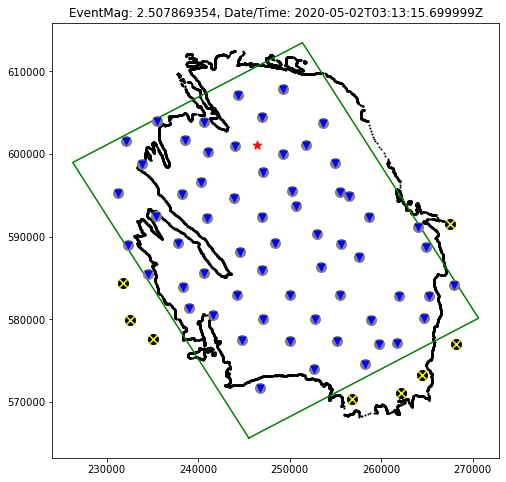

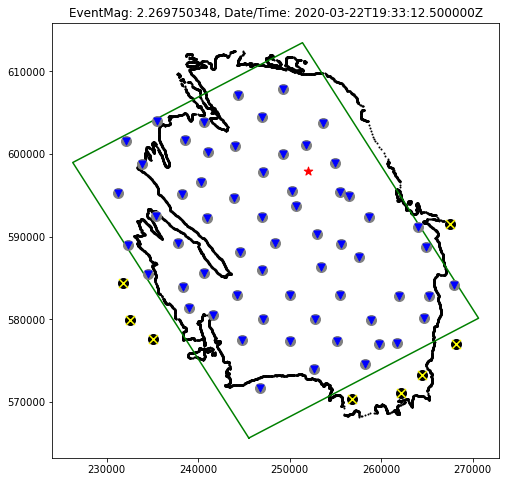

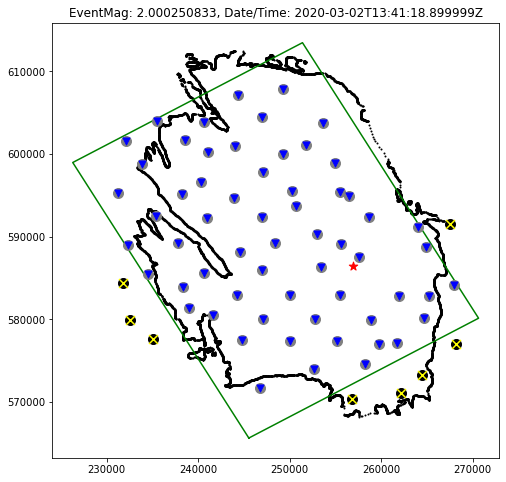

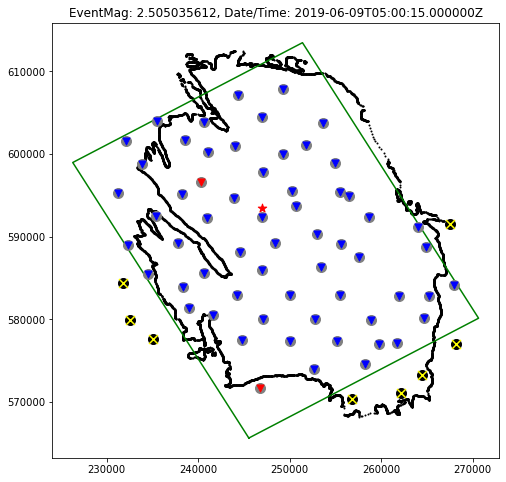

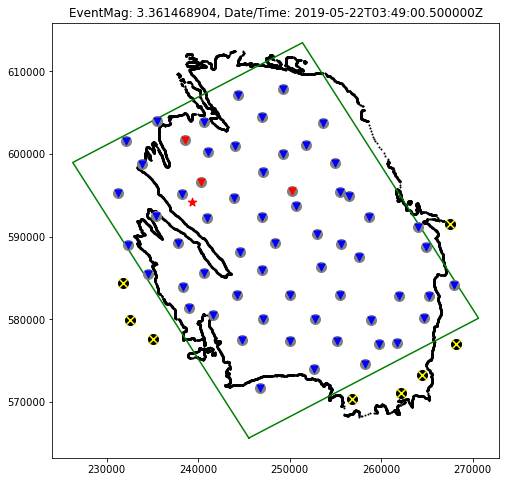

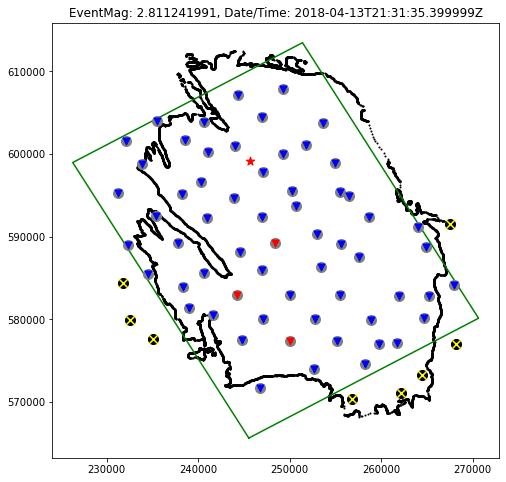

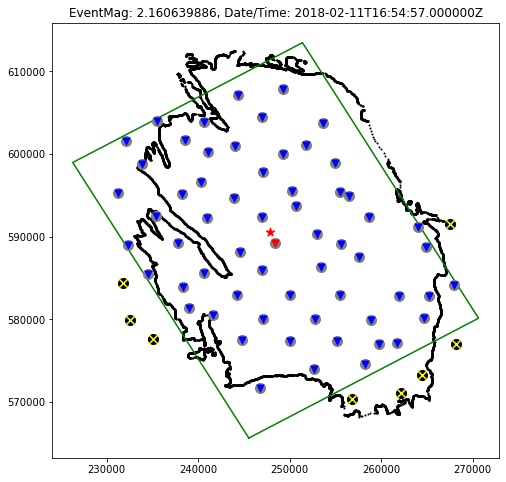

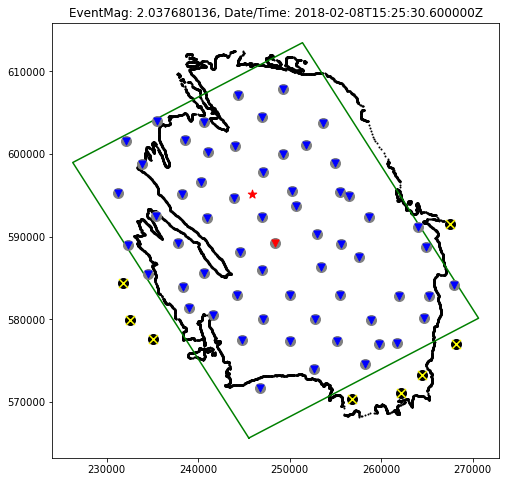

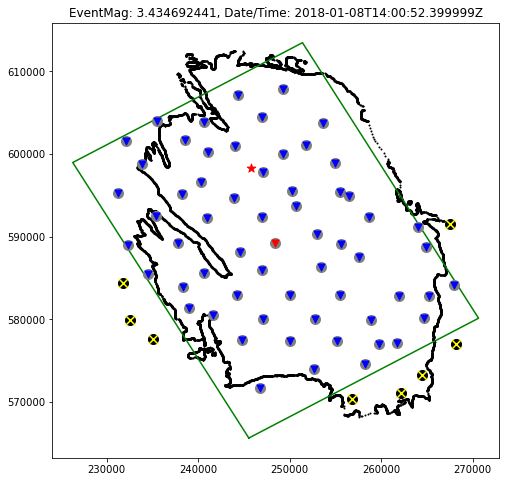

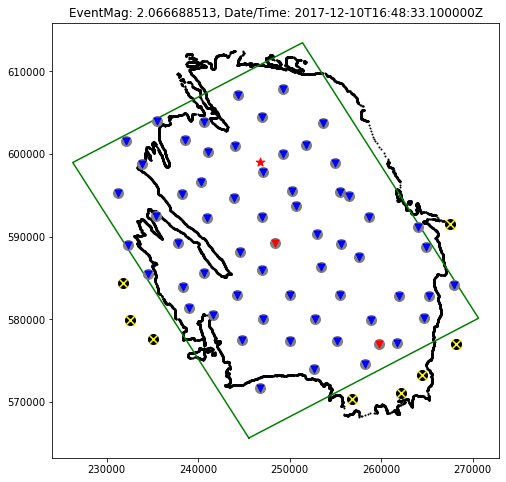

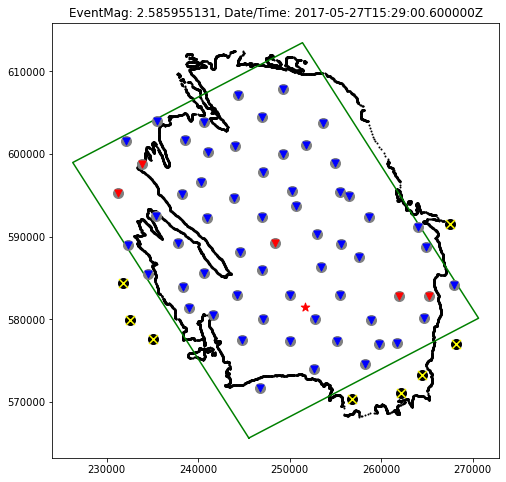

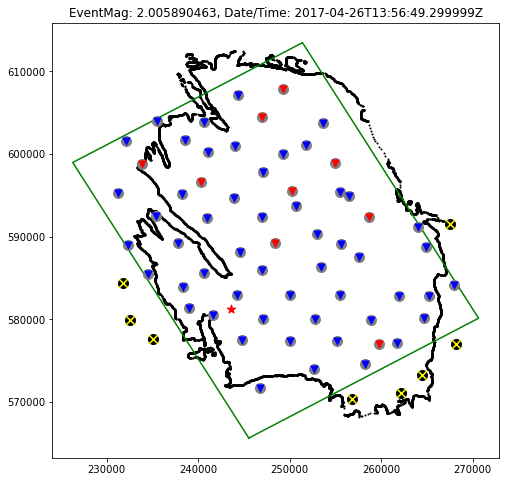

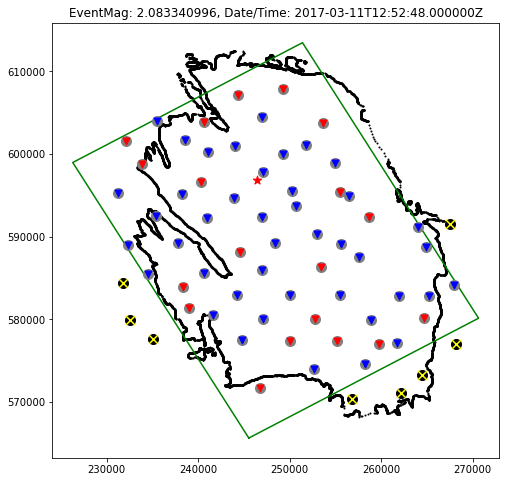

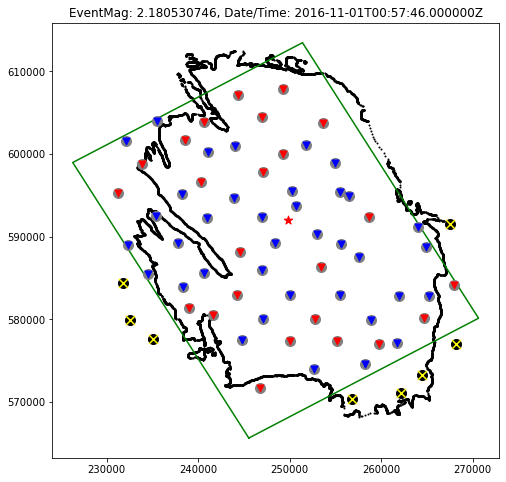

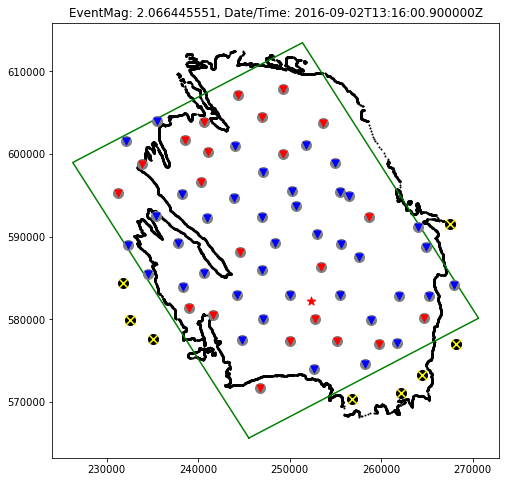

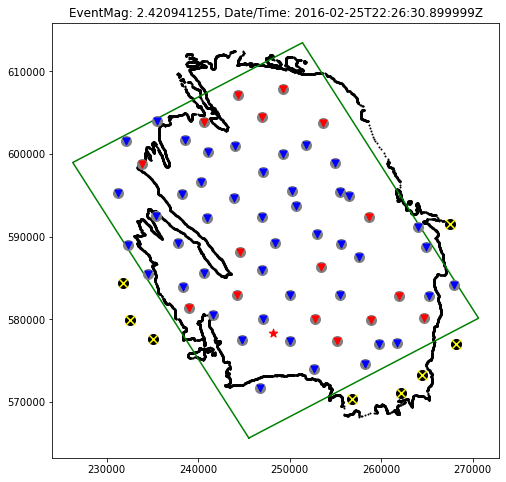

In [9]:
#%matplotlib notebook
from gnam.events.munge.knmi import correct_station_depths as csd_f
import shapefile as sf
import matplotlib.pyplot as plt 
import numpy as np

mysf = sf.Reader('FieldShapeFile/Groningen_field')
print('mysf:',mysf)
print('mysf.shapes():',mysf.shapes())
s = mysf.shape(0)

shape_xy = np.asarray(s.points)
print(shape_xy)

#correct the knmi station depths
dill_snorth.correct_stations(csd_f)


ekeys = dill_snorth.getEventKeys()
print(ekeys)
bkeys = dill_snorth.getBoreholeKeys()
print(bkeys)

i_bb_evnt = enorth.getIncCoords()
loc_i_bb_evnt = enorth.getLocalIncCoords()
o_bb_evnt = enorth.getExcCoords()
all_bb_evnt = enorth.getOrigCoords()

stations3 = dill_snorth.getIncludedStations(0,3)
stations4 = dill_snorth.getIncludedStations(0,4)
print('Station List:')
'''
for ist in range(len(stations3)):
    scode3 = stations3[ist].code
    #if scode3 == 'G054':
        #stations3[ist].channels[0].depth = 180
    print('stations[%d].%s:' %(ist,stations3[ist].code),vars(stations3[ist]))
    print('stations3[%d].%s:' %(ist,stations3[ist].code),stations3[ist].channels[0].depth)
    print('stations4[%d].%s:' %(ist,stations4[ist].code),stations4[ist].channels[0].depth)
    print()



'''

for ie in ekeys:
    xy3 = dill_snorth.getIncStationCoords(ie,bkeys[0])
    xy4 = dill_snorth.getIncStationCoords(ie,bkeys[0])
    ex_xy3 = dill_snorth.getExcStationCoords(ie,bkeys[0])
    er_xy3 = dill_snorth.getErrStationCoords(ie,bkeys[0])
    ex_xy4 = dill_snorth.getExcStationCoords(ie,bkeys[1])
    er_xy4 = dill_snorth.getErrStationCoords(ie,bkeys[1])

    fig, ax = plt.subplots(1,figsize=(8,8))
    ax.scatter(i_bb_evnt[ie,0],i_bb_evnt[ie,1],s=80,c='red',marker='*',zorder=2)
    ax.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
    ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=1)
    ax.scatter(xy3[:,0],xy3[:,1],s=50,c='blue',marker='v',zorder=3)
    ax.scatter(xy4[:,0],xy4[:,1],s=100,c='gray',marker='o',zorder=2)
    ax.scatter(ex_xy3[:,0],ex_xy3[:,1],s=80,c='yellow',marker='x',zorder=4)
    ax.scatter(er_xy3[:,0],er_xy3[:,1],s=50,c='red',marker='v',zorder=4)
    ax.scatter(ex_xy4[:,0],ex_xy4[:,1],s=100,c='black',marker='o',zorder=3)
    ax.scatter(er_xy4[:,0],er_xy4[:,1],s=100,c='gray',marker='o',zorder=3)
    otime = enorth[ie].origins[0].time
    mag = enorth[ie].magnitudes[0].mag
    title_str = 'EventMag: ' + str(mag) + ', Date/Time: ' + str(otime)
    ax.set_title(title_str)
    plt.show()

          Date   ML  Latitude  Longitude    X-rd    Y-rd  Depth  Depth +/-  \
nr                                                                           
1   2016-02-25  2.4   53.1819     6.7814  248203  578149   3040         43   
2   2016-09-02  2.1   53.2201     6.8411  252108  582478   2905        103   
3   2016-11-01  2.2   53.2978     6.8045  249493  591076   3000         32   
4   2017-03-11  2.1   53.3418     6.7576  246274  595912   3023         24   
5   2017-04-26  2.0   53.2100     6.7126  243547  581189   3286          7   
6   2017-05-27  2.6   53.2092     6.8331  251598  581255   2935         78   
7   2017-12-10  2.1   53.3622     6.7666  246829  598193   2984         47   
8   2018-01-08  3.4   53.3573     6.7517  245848  597629   3030         89   
9   2018-02-08  2.0   53.3359     6.7472  245593  595242   2947         20   
10  2018-02-11  2.2   53.2947     6.7786  247773  590697   3004         24   
11  2018-04-13  2.8   53.3635     6.7459  245449  598312   3014 

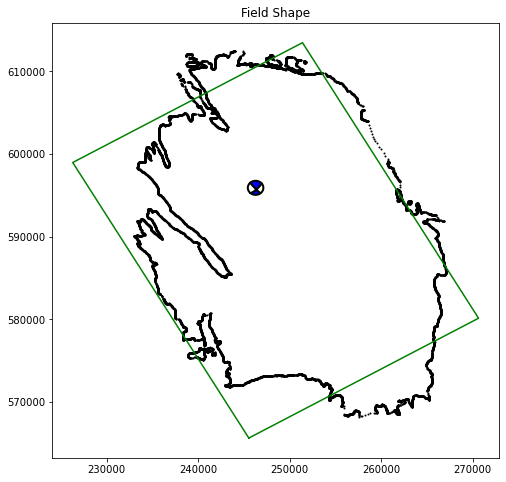

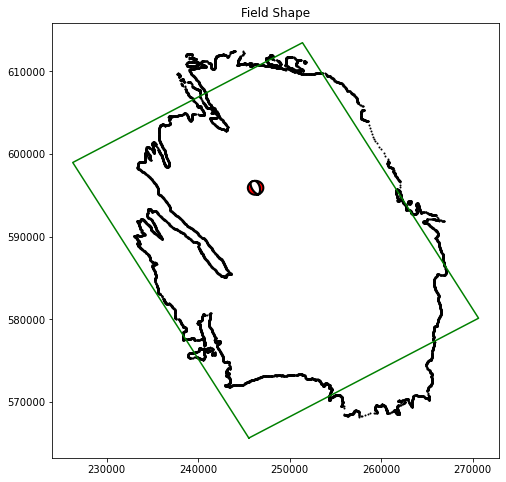

In [5]:
from gnam.events.mtensors import mtensors
import gnam.events.gstations
import importlib
importlib.reload(gnam.events.gstations)
from gnam.specutils.write import write_stations as spec_ws
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv("event_moments.csv",sep=",",index_col=0)
print(df)
print()

df = df.drop(columns=['ML','Latitude', 'Longitude', 'X-rd', 'Y-rd'])
#df = df.drop(columns=['ML'])
#print('ML, Lat, Lon, xrd, yrd')
print('Column Names:',df.columns)
print(df)

#edates = df[['Date']].to_string()
edates = df['Date'].to_numpy()
print('type(edates):',type(edates))
print('edates:',edates)
print()

gf_mts = mtensors('event_moments.csv')
gf_df = gf_mts.get_df()
print('gf_df:\n',gf_df)
print()
utc_list = gf_mts.get_dates()
print('utc_list:\n',utc_list)

ml_list = gf_mts.get_mags()
print('ml_list:\n',ml_list)

print('gf_mts:\n',gf_mts)
print('len(gf_mts):',len(gf_mts))

for imt in range(len(gf_mts)):
    print('Tensor[%d]:' %(imt))
    print(gf_mts[imt])
    
aki_bballs = gf_mts.get_aki_beachballs(diam=1700)
cmt_bballs = gf_mts.get_cmt_beachballs(diam=1700,fc='red')
print('num beachballs:',len(aki_bballs))
print()
aki_xc = gf_mts.get_xcoords()
print('beachball xcoords:\n',aki_xc)
print()


fig, ax = plt.subplots(1,figsize=(8,8))
'''
for ib in range(len(aki_bballs)):
    ax.add_collection(aki_bballs[ib])
'''
ax.add_collection(aki_bballs[3])
#ax.add_collection(aki_bballs[2])
ax.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
#ax.scatter(xy3[:,0],xy3[:,1],s=50,c='blue',marker='v',zorder=3)
#ax.scatter(xy4[:,0],xy4[:,1],s=100,c='gray',marker='o',zorder=2)
#ax.scatter(ex_xy3[:,0],ex_xy3[:,1],s=80,c='yellow',marker='x',zorder=4)
#ax.scatter(er_xy3[:,0],er_xy3[:,1],s=50,c='red',marker='v',zorder=4)
#ax.scatter(ex_xy4[:,0],ex_xy4[:,1],s=100,c='black',marker='o',zorder=3)
#ax.scatter(er_xy4[:,0],er_xy4[:,1],s=100,c='gray',marker='o',zorder=3)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=0)
ax.set_title('Field Shape')

fig1, ax1 = plt.subplots(1,figsize=(8,8))
'''
for ib in range(len(cmt_bballs)):
    ax1.add_collection(cmt_bballs[ib])
'''
ax1.add_collection(cmt_bballs[3])
ax1.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
#ax1.scatter(xy3[:,0],xy3[:,1],s=50,c='blue',marker='v',zorder=3)
#ax1.scatter(xy4[:,0],xy4[:,1],s=100,c='gray',marker='o',zorder=2)
#ax1.scatter(ex_xy3[:,0],ex_xy3[:,1],s=80,c='yellow',marker='x',zorder=4)
#ax1.scatter(er_xy3[:,0],er_xy3[:,1],s=50,c='red',marker='v',zorder=4)
#ax1.scatter(ex_xy4[:,0],ex_xy4[:,1],s=100,c='black',marker='o',zorder=3)
#ax1.scatter(er_xy4[:,0],er_xy4[:,1],s=100,c='gray',marker='o',zorder=3)
ax1.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=0)
ax1.set_title('Field Shape')

plt.show()


spec_ws('./stations_ipynb2',dill_snorth,0,(3,4))


In [6]:
from gnam.specutils.write import write_cmtsolution as spec_wcmt

ie_cat = enorth.getIncCatalog()
#ie_cat = ie_cat[-1]
print(ie_cat[3].origins[0].time)
ne = len(ie_cat)-1
print('ne:',ne)
gf_mts.update_utcdatetime(ie_cat)
'''
for im in range(len(gf_mts)):
    ie = ne - im
    print('ie:',ie)
    print('ie_cat[%d][Date]: %s' %(im,ie_cat[ie].origins[0].time))
    print('gf_mts[%d][Date]: %s' %(im,gf_mts[im]['Date']))
'''
e2mt_dict = gf_mts.map_events_2_tensors(ie_cat)
e2mt_keys = e2mt_dict.keys()
for key in e2mt_keys:
    print('ie_cat[%d][Date]: %s' %(key,ie_cat[key].origins[0].time))
    print('gf_mts[%d][Date]: %s' %(key,e2mt_dict[key]['Date']))
    print('ie_cat[%d][Date]: %s' %(key,ie_cat[key].magnitudes[0].mag))
    print('gf_mts[%d][Date]: %s' %(key,e2mt_dict[key]['ML']))
    print()
    

spec_wcmt('./cmtsolutions_ipynb2',gf_mts[-1])

2019-06-09T05:00:15.000000Z
ne: 15
ie_cat[15][Date]: 2016-02-25T22:26:30.899999Z
gf_mts[15][Date]: 2016-02-25T22:26:30.899999Z
ie_cat[15][Date]: 2.420941255
gf_mts[15][Date]: 2.4

ie_cat[14][Date]: 2016-09-02T13:16:00.900000Z
gf_mts[14][Date]: 2016-09-02T13:16:00.900000Z
ie_cat[14][Date]: 2.066445551
gf_mts[14][Date]: 2.1

ie_cat[13][Date]: 2016-11-01T00:57:46.000000Z
gf_mts[13][Date]: 2016-11-01T00:57:46.000000Z
ie_cat[13][Date]: 2.180530746
gf_mts[13][Date]: 2.2

ie_cat[12][Date]: 2017-03-11T12:52:48.000000Z
gf_mts[12][Date]: 2017-03-11T12:52:48.000000Z
ie_cat[12][Date]: 2.083340996
gf_mts[12][Date]: 2.1

ie_cat[11][Date]: 2017-04-26T13:56:49.299999Z
gf_mts[11][Date]: 2017-04-26T13:56:49.299999Z
ie_cat[11][Date]: 2.005890463
gf_mts[11][Date]: 2.0

ie_cat[10][Date]: 2017-05-27T15:29:00.600000Z
gf_mts[10][Date]: 2017-05-27T15:29:00.600000Z
ie_cat[10][Date]: 2.585955131
gf_mts[10][Date]: 2.6

ie_cat[9][Date]: 2017-12-10T16:48:33.100000Z
gf_mts[9][Date]: 2017-12-10T16:48:33.100000Z
ie_ca

TypeError: write_cmtsolution() missing 2 required positional arguments: 'lx' and 'ly'

In [7]:
experiments = []
e2mt_dict = gf_mts.map_events_2_tensors(ie_cat)
e2mt_keys = e2mt_dict.keys()
for ekey in e2mt_keys:
    bkeys = dill_snorth.getBoreholeKeys()
    bh_stat_list = []
    for bkey in bkeys:
        bh_stat_list.append(dill_snorth.getIncludedStations(ekey,bkey))
    bh_stat_tup = tuple(bh_stat_list)   
    exp_set = {'EKEY':ekey,'EVENT':ie_cat[ekey],'TENSOR':e2mt_dict[ekey],'STATIONS':bh_stat_tup}
    experiments.append(exp_set)

for eset in experiments:
    fqn = 'tmp/'
    pid = 'TAC'
    nid = 'NL'
    y = eset['EVENT'].origins[0].time.year
    m = eset['EVENT'].origins[0].time.month
    d = eset['EVENT'].origins[0].time.day
    dname = '%s%s_%s_%s_%02d_%02d' %(fqn,pid,nid,y,m,d)
    print('Experiment-%d:\n'%(eset['EKEY']), dname)
    print()

Experiment-15:
 tmp/TAC_NL_2016_02_25

Experiment-14:
 tmp/TAC_NL_2016_09_02

Experiment-13:
 tmp/TAC_NL_2016_11_01

Experiment-12:
 tmp/TAC_NL_2017_03_11

Experiment-11:
 tmp/TAC_NL_2017_04_26

Experiment-10:
 tmp/TAC_NL_2017_05_27

Experiment-9:
 tmp/TAC_NL_2017_12_10

Experiment-8:
 tmp/TAC_NL_2018_01_08

Experiment-7:
 tmp/TAC_NL_2018_02_08

Experiment-6:
 tmp/TAC_NL_2018_02_11

Experiment-5:
 tmp/TAC_NL_2018_04_13

Experiment-4:
 tmp/TAC_NL_2019_05_22

Experiment-3:
 tmp/TAC_NL_2019_06_09



In [33]:
import os

# define the name of the directory to be created
path = "tmp/year/test"

# define the access rights
access_rights = 0o755

try:
    os.makedirs(path, access_rights)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s" % path)

Successfully created the directory tmp/year/test


In [8]:
from gnam.specutils.write import write_cmtsolution as spec_wcmt
from gnam.specutils.write import write_stations as spec_ws
import os

# define the access rights
access_rights = 0o755

for eset in experiments:
    fqn = 'tmp/'
    pid = 'TAC'
    nid = 'NL'
    y = eset['EVENT'].origins[0].time.year
    m = eset['EVENT'].origins[0].time.month
    d = eset['EVENT'].origins[0].time.day
    dname = '%s%s_%s_%s_%02d_%02d/DATA' %(fqn,pid,nid,y,m,d)
    print('Experiment-%d:\n'%(eset['EKEY']), dname)
    try:
        os.makedirs(dname, access_rights)
    except OSError:
        print ("Creation of the directory %s failed" % dname)
        print()
    else:
        bkeys = dill_snorth.getBoreholeKeys()
        lxy = enorth.getLocalEventCoord(eset['EKEY'])
        spec_wcmt(dname + '/CMTSOLUTION',eset['TENSOR'],lxy[0],lxy[1])
        spec_ws(dname + '/STATIONS',dill_snorth,eset['EKEY'],bkeys)
        print ("Successfully created the directory %s" % dname)
        print()
        

Experiment-15:
 tmp/TAC_NL_2016_02_25/DATA
Successfully created the directory tmp/TAC_NL_2016_02_25/DATA

Experiment-14:
 tmp/TAC_NL_2016_09_02/DATA
Successfully created the directory tmp/TAC_NL_2016_09_02/DATA

Experiment-13:
 tmp/TAC_NL_2016_11_01/DATA
Successfully created the directory tmp/TAC_NL_2016_11_01/DATA

Experiment-12:
 tmp/TAC_NL_2017_03_11/DATA
Successfully created the directory tmp/TAC_NL_2017_03_11/DATA

Experiment-11:
 tmp/TAC_NL_2017_04_26/DATA
Successfully created the directory tmp/TAC_NL_2017_04_26/DATA

Experiment-10:
 tmp/TAC_NL_2017_05_27/DATA
Successfully created the directory tmp/TAC_NL_2017_05_27/DATA

Experiment-9:
 tmp/TAC_NL_2017_12_10/DATA
Successfully created the directory tmp/TAC_NL_2017_12_10/DATA

Experiment-8:
 tmp/TAC_NL_2018_01_08/DATA
Successfully created the directory tmp/TAC_NL_2018_01_08/DATA

Experiment-7:
 tmp/TAC_NL_2018_02_08/DATA
Successfully created the directory tmp/TAC_NL_2018_02_08/DATA

Experiment-6:
 tmp/TAC_NL_2018_02_11/DATA
Success

In [3]:
import obspy
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime

e_st3 = dill_snorth.getStreamZ(3,3)
e_st4 = dill_snorth.getStreamZ(3,4)

e_st = e_st3 + e_st4

e_st.filter('bandpass',freqmin=1.0,freqmax=18.0,corners=4)
e_st.plot()

IndexError: Empty stream object

In [15]:
lone = ['a','b','c']
ltwo = [1,2,3]
lthr = ['d',4,'e',5]
mylist = []
mylist.append(lone)
mylist.append(ltwo)
mylist.append(lthr)
mytup = tuple(mylist)
print(mytup)
mytup[0][0]='z'
print(mytup)

(['a', 'b', 'c'], [1, 2, 3], ['d', 4, 'e', 5])
(['z', 'b', 'c'], [1, 2, 3], ['d', 4, 'e', 5])


In [ ]:
i_bb_evnt = enorth.getIncCoords()
o_bb_evnt = enorth.getExcCoords()
all_bb_evnt = enorth.getOrigCoords()

fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(i_bb_evnt[:,0],i_bb_evnt[:,1],s=80,c='red',marker='*',zorder=2)
ax.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
ax.scatter(xy3[:,0],xy3[:,1],s=50,c='blue',marker='v',zorder=3)
ax.scatter(xy4[:,0],xy4[:,1],s=100,c='gray',marker='o',zorder=2)
ax.scatter(ex_xy3[:,0],ex_xy3[:,1],s=80,c='yellow',marker='x',zorder=4)
ax.scatter(er_xy3[:,0],er_xy3[:,1],s=50,c='red',marker='v',zorder=4)
ax.scatter(ex_xy4[:,0],ex_xy4[:,1],s=100,c='black',marker='o',zorder=3)
ax.scatter(er_xy4[:,0],er_xy4[:,1],s=100,c='gray',marker='o',zorder=3)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=0)
ax.set_title('Field Shape')
plt.show()

In [ ]:
from obspy.clients.fdsn import Client
from obspy import Stream
import time

def test_run(cat):
    stt = Stream()
    for e in cat[1:2]:
        t1 = e.origins[0].time
        t2 = t1 + 16384//200 + 1
        network = inventory[0]
        for station in network:
            try:
                stt += client.get_waveforms(network.code, station.code, "*", "HHZ", 
                                           t1, t2)
                                           #t1, t1 + 60, attach_response = True)
                #print()
                #print('Worked.  :',vars(station))
                #stt.plot()
            except:
                pass
                #print()
                #print('Exception:',vars(station))
                
    return stt

client = Client("KNMI")
stations = 'G0*4,G1*4,G2*4,G3*4,G4*4,G5*4,G6*4,G70*4'
inventory = client.get_stations(network="NL", station=stations , level="response")

ecat = enorth.getIncCatalog()
print('Catalog:\n',ecat)

start = time.time()
mystream = test_run(ecat)
end = time.time()
print('Time:',end - start)

In [ ]:
from pyproj import Proj, transform
import shapefile as sf
import matplotlib.pyplot as plt 
import numpy as np

gron_sf = sf.Reader('FieldShapeFile/Groningen_field')
print('gron_sf:',gron_sf)
print('gron_sf.shapes():',gron_sf.shapes())
gs = gron_sf.shape(0)

gf_bb = gs.bbox
print('gf_bb:',gf_bb)

gf_pts = np.asarray(gs.points)

lat = 53.283266 #picked form google maps just above Schildmeer
lon = 6.813186  #picked form google maps just above Schildmeer

wgs84_proj= Proj('epsg:4326')
nl_proj = Proj('epsg:28992')

x,y = transform(wgs84_proj,nl_proj,lat,lon)
print('x,y = %f,%f' %(x,y))

nlat,nlon = transform(nl_proj,wgs84_proj,x,y)
print('olat,olon = %f,%f' %(lat,lon))
print('nlat,nlon = %f,%f' %(nlat,nlon))

#pbbox_x = np.array([mybbox[0],mybbox[0],mybbox[2],mybbox[2],mybbox[0]])
#pbbox_y = np.array([mybbox[1],mybbox[3],mybbox[3],mybbox[1],mybbox[1]])

#c_loop = np.array([[mybbox[0],mybbox[1]],[mybbox[0],mybbox[3]],
                   #[mybbox[2],mybbox[3]],[mybbox[2],mybbox[1]],
                   #[mybbox[0],mybbox[1]]])
#
#gf_bbox = bb(c_loop)
plt_gfbb_x = np.array([gf_bb[0],gf_bb[2]])
plt_gfbb_y = np.array([gf_bb[1],gf_bb[3]])

xspan = plt_gfbb_x[1] - plt_gfbb_x[0]
yspan = plt_gfbb_y[1] - plt_gfbb_y[0]
llat,llon = transform(nl_proj,wgs84_proj,plt_gfbb_x[0]-xspan,plt_gfbb_y[0]-yspan)
print('llat,llon = %f,%f' %(llat,llon))
ulat,ulon = transform(nl_proj,wgs84_proj,plt_gfbb_x[1]+xspan,plt_gfbb_y[1]+yspan)
print('ulat,ulon = %f,%f' %(ulat,ulon))

lat0 = 0.5*(ulat-llat)
lon0 = 0.5*(ulon-llon)

lx,ly = transform(wgs84_proj,nl_proj,llat,llon)
ux,uy = transform(wgs84_proj,nl_proj,ulat,ulon)

map_gf = np.zeros(gf_pts.shape)
print('gf_pts.shape:',gf_pts.shape)
print('map_gf.shape:',map_gf.shape)

for ic in range(len(gf_pts[:,0])):
    ilat,ilon = transform(nl_proj,wgs84_proj,gf_pts[ic,0],gf_pts[ic,1])
    map_gf[ic,0] = ilat
    map_gf[ic,1] = ilon

fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(gf_pts[:,0],gf_pts[:,1],s=1,c='black',zorder=0)
ax.scatter(plt_gfbb_x[0],plt_gfbb_y[0],s=80,c='red',marker='x',zorder=1)
ax.scatter(plt_gfbb_x[1],plt_gfbb_y[1],s=80,c='red',marker='x',zorder=1)
ax.scatter(lx,ly,s=40,c='gray',marker='o',zorder=1)
ax.scatter(ux,uy,s=40,c='blue',marker='o',zorder=1)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=ulon,urcrnrlat=ulat,
            resolution='h',projection='tmerc',lon_0=lon0,lat_0=lat0)
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
m.scatter(map_gf[:,0],map_fg[:,1])
#m.bluemarble()

plt.show()